In [1]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.
  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary
  u_D = 1 + x^2 + 2y^2
    f = -6
"""
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [3]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx



In [4]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


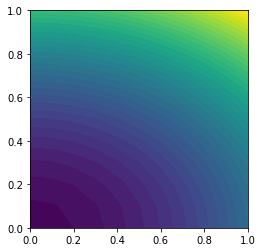

In [7]:
# Plot solution and mesh
plot(u)
# plot(mesh)

In [8]:
ufile = File('poisson/solution.pvd')
ufile.write(u)

In [9]:
afile = File('poisson/solution.pvd')

In [10]:
ufile

In [11]:
# Save solution to file in VTK format
# vtkfile = File('poisson/solution.pvd')
# vtkfile << u

In [12]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
error_L2  = 0.005270462766949098
error_max = 3.552713678800501e-15


In [13]:
with open('fileFUN','a+') as fileFUN:
    fileFUN.write()

TypeError: write() takes exactly one argument (0 given)

In [ ]:
with open('fileFUN','r') as fileFUN:
    a=fileFUN.readlines()
    print(a)

['[2,2][2,2][2,2]']
